In [1]:
import sys
import numpy as np
import pandas as pd
# import pyqtgraph as pg
import cnmodel as cnm
from cnmodel import populations
from neuron import h
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:
vertical = populations.Tuberculoventral()
pyramidal = populations.Pyramidal()

vertical.connect(pyramidal)

cf = 16e3
pyramidal_id = pyramidal.select(1, cf=cf, create=True)
pyramidal.resolve_inputs(depth=1)
pyramidal_cell = pyramidal.get_cell(pyramidal_id)[0]

getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse


In [3]:
vertical_ids = vertical.real_cells()
vertical_cf_id = vertical_ids[np.argmin(np.abs(cf - vertical._cells['cf'][vertical_ids]))]
vertical_cf = vertical._cells['cf'][vertical_cf_id]
vertical_cell= vertical.get_cell(vertical_cf_id)
vertical_cf_id, vertical_cf

(np.int64(3567), np.float64(15931.38733717155))

In [4]:
vertical_v = h.Vector().record(vertical_cell.soma(0.5)._ref_v)
pyramidal_v = h.Vector().record(pyramidal_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

## NS -> Pyr -> IC

In [ ]:
ic_cell = cnm.cells.Pyramidal().create()
ic_v = h.Vector().record(ic_cell.soma(0.5)._ref_v)

### NS -> Pyr

In [ ]:
ns_ic = h.NetStim()
ns_ic.interval = 1000/40  # 80 Hz
ns_ic.number = 2e9
ns_ic.start = 20
ns_ic.noise = 0.8
ns_ic.seed(74)

stim_t_pyr = h.Vector()
stim_id_pyr = h.Vector()
e_syn_pyr = h.ExpSyn(pyramidal_cell.soma(0.5))
nc_pyr = h.NetCon(ns_ic, e_syn_pyr)
nc_pyr.weight[0] = 1
nc_pyr.record(stim_t_pyr, stim_id_pyr)

### Pyr -> IC

In [ ]:
e_syn_pic = h.Exp2Syn(ic_cell.soma(0.5))
e_syn_pic.tau2 = 2

nc = h.NetCon(pyramidal_cell.soma(0.5)._ref_v, e_syn_pic, sec=pyramidal_cell.soma)
nc.weight[0] = 1

In [ ]:
stim_t = h.Vector()
stim_id = h.Vector()
nc.record(stim_t, stim_id)

h.tstop = 0.2*1000
h.dt = 0.025
h.celsius = 34.0

cnm.util.custom_init()
h.run()

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs.ravel()

axs[0].plot(t, pyramidal_v)
axs[0].set_title('Pyramidal')
axs[0].vlines(list(stim_t_pyr), ymin=-5, ymax=5, color='k')

axs[1].plot(t, ic_v)
axs[1].set_title('IC')


## NS -> IC -> Pyr

In [5]:
ic_cell = cnm.cells.Pyramidal().create()
ic_v = h.Vector().record(ic_cell.soma(0.5)._ref_v)

### NS -> IC

In [25]:
ns_ic = h.NetStim()
ns_ic.interval = 1000/40  # 80 Hz
ns_ic.number = 2e9
ns_ic.start = 20
ns_ic.noise = 0.8
ns_ic.seed(74)

stim_t_ic = h.Vector()
stim_id_ic = h.Vector()
e_syn_ic = h.ExpSyn(ic_cell.soma(0.5))
nc_ic = h.NetCon(ns_ic, e_syn_ic)
nc_ic.weight[0] = 1
nc_ic.record(stim_t_ic, stim_id_ic)

0.0

### IC -> Pyr

In [26]:
e_syn_icp = h.Exp2Syn(pyramidal_cell.soma(0.5))
e_syn_icp.tau2 = 2

nc = h.NetCon(ic_cell.soma(0.5)._ref_v, e_syn_icp, sec=ic_cell.soma)
nc.weight[0] = 0.001

In [27]:
stim_t = h.Vector()
stim_id = h.Vector()
nc.record(stim_t, stim_id)

h.tstop = 0.2*1000
h.dt = 0.025
h.celsius = 34.0

cnm.util.custom_init()
h.run()

0.0

Text(0.5, 1.0, 'Pyramidal')

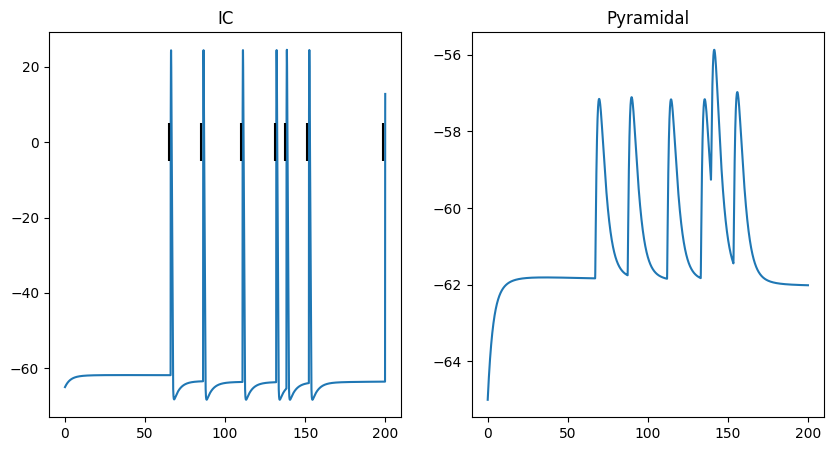

In [28]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs.ravel()

axs[0].plot(t, ic_v)
axs[0].set_title('IC')
axs[0].vlines(list(stim_t_ic), ymin=-5, ymax=5, color='k')

axs[1].plot(t, pyramidal_v)
axs[1].set_title('Pyramidal')

## NS -> IC <-> Pyr

### NS -> IC

In [34]:
ns_ic = h.NetStim()
ns_ic.interval = 1000/80  # 80 Hz
ns_ic.number = 2e9
ns_ic.start = 10
ns_ic.noise = 0.8
ns_ic.seed(74)

stim_t_ic = h.Vector()
stim_id_ic = h.Vector()
e_syn_ic = h.ExpSyn(ic_cell.soma(0.5))
nc_ic = h.NetCon(ns_ic, e_syn_ic)
nc_ic.weight[0] = 1
nc_ic.record(stim_t_ic, stim_id_ic)

0.0

### IC -> Pyr

In [35]:
e_syn_icp = h.Exp2Syn(pyramidal_cell.soma(0.5))
e_syn_icp.tau2 = 2

nc_icp = h.NetCon(ic_cell.soma(0.5)._ref_v, e_syn_icp, sec=ic_cell.soma)
nc_icp.weight[0] = 0.001

### Pyr -> IC

In [36]:
e_syn_pic = h.Exp2Syn(ic_cell.soma(0.5))
e_syn_pic.tau2 = 2

nc_pic = h.NetCon(pyramidal_cell.soma(0.5)._ref_v, e_syn_pic, sec=pyramidal_cell.soma)
nc_pic.weight[0] = 1

stim_t_pic = h.Vector()
stim_id_pic = h.Vector()
nc_pic.record(stim_t_pic, stim_id_pic)

0.0

In [37]:
h.tstop = 0.2*1000
h.dt = 0.025
h.celsius = 34.0

cnm.util.custom_init()
h.run()

0.0

Text(0.5, 1.0, 'Pyramidal')

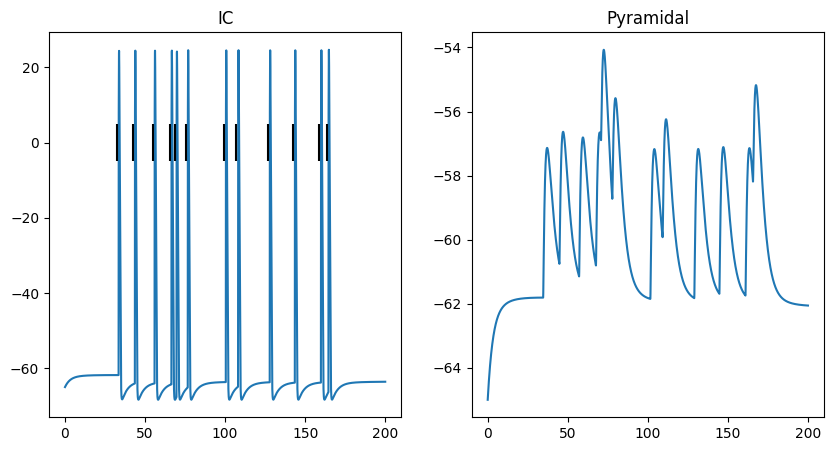

In [38]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs.ravel()

axs[0].plot(t, ic_v)
axs[0].set_title('IC')
axs[0].vlines(list(stim_t_ic), ymin=-5, ymax=5, color='k')
axs[0].vlines(list(stim_t_pic), ymin=-30, ymax=-20, color='tab:green')

axs[1].plot(t, pyramidal_v)
axs[1].set_title('Pyramidal')

## NS -> Vertical and Pyr

In [ ]:
# ns_icp = h.NetStim()
# ns_icp.interval = 1000/80  # 80 Hz
# ns_icp.number = 2e9
# ns_icp.start = 50
# ns_icp.noise = 1
# nc_icp = h.NetCon(ns_icp, pyramidal.soma(0.5))
# nc_icv.weight = 0.4

0.0

Vector[0]

In [62]:
vertical_spikes = np.array(t)[np.argwhere((np.array(vertical_v)[1:] > -20) & (np.array(vertical_v)[:-1] <= -20))]

num_spikes = len(vertical_spikes)
num_isi = num_spikes - 1 if num_spikes > 0 else 0
num_isi / (vertical_spikes[-1] - vertical_spikes[0]) * 1000 if num_spikes > 0 else 0

array([85.50923805])

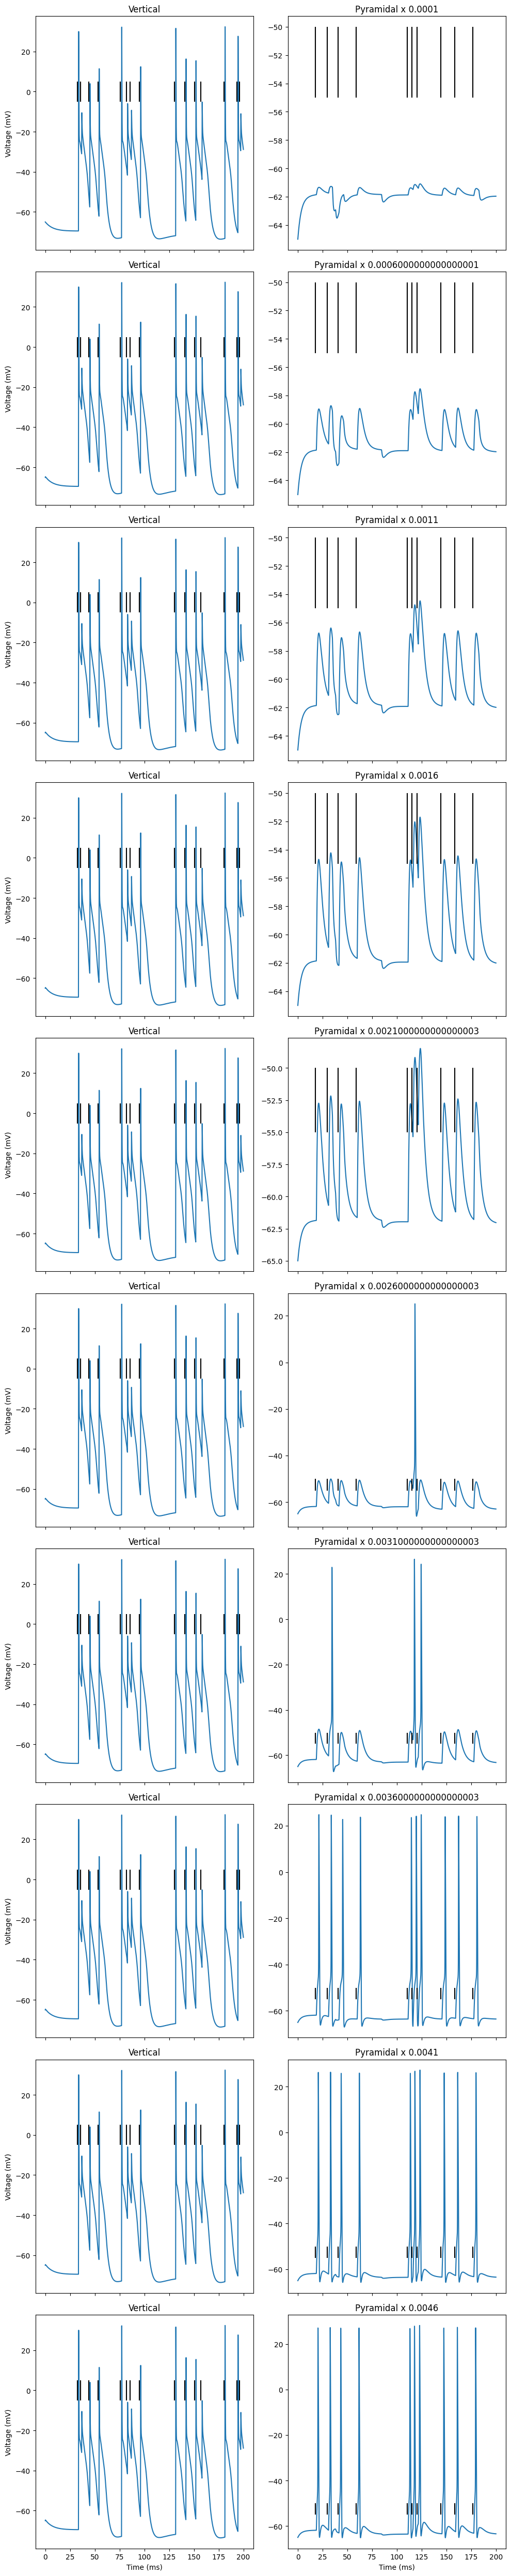

In [9]:
# IC -> Vertical
e_syn_icv = h.Exp2Syn(vertical_cell.soma(0.5))
e_syn_icv.tau2 = 1.5

ns_icv = h.NetStim()
ns_icv.interval = 1000/80  # 80 Hz
ns_icv.number = 2e9
ns_icv.start = 10
ns_icv.noise = 0.8
ns_icv.seed(74)

stim_t_icv = h.Vector()
stim_id_icv = h.Vector()
nc_icv = h.NetCon(ns_icv, e_syn_icv)
nc_icv.weight[0] = 1
nc_icv.record(stim_t_icv, stim_id_icv)

icp_weights = [0.0001 * i for i in range(1, 50, 5)]

fig, axs = plt.subplots(len(icp_weights), 2, figsize=(10,len(icp_weights)*5), sharex=True)

for i, icp_weight in enumerate(icp_weights):
    # IC -> Pyramidal
    e_syn_icp = h.Exp2Syn(pyramidal_cell.soma(0.5))
    e_syn_icp.tau2 = 2

    ns_icp = h.NetStim()
    ns_icp.interval = 1000/80  # 80 Hz
    ns_icp.number = 2e9
    ns_icp.start = 10
    ns_icp.noise = 0.8
    ns_icp.seed(74)

    stim_t_icp = h.Vector()
    stim_id_icp = h.Vector()
    nc_icp = h.NetCon(ns_icp, e_syn_icp)
    nc_icp.weight[0] = icp_weight
    nc_icp.record(stim_t_icp, stim_id_icp)

    h.tstop = 0.2*1000
    h.dt = 0.025
    h.celsius = 34.0

    cnm.util.custom_init()
    h.run()

    axs[i,0].plot(t, vertical_v)
    axs[i,0].set_title('Vertical')
    axs[i,0].vlines(list(stim_t_icv), ymin=-5, ymax=5, color='k')

    axs[i,1].plot(t, pyramidal_v)
    axs[i,1].set_title(f'Pyramidal x {icp_weight}')
    axs[i,1].vlines(list(stim_t_icp), ymin=-55, ymax=-50, color='k')

    axs[i,0].set_ylabel('Voltage (mV)')

axs[-1,0].set_xlabel('Time (ms)')
axs[-1,1].set_xlabel('Time (ms)')
fig.tight_layout()

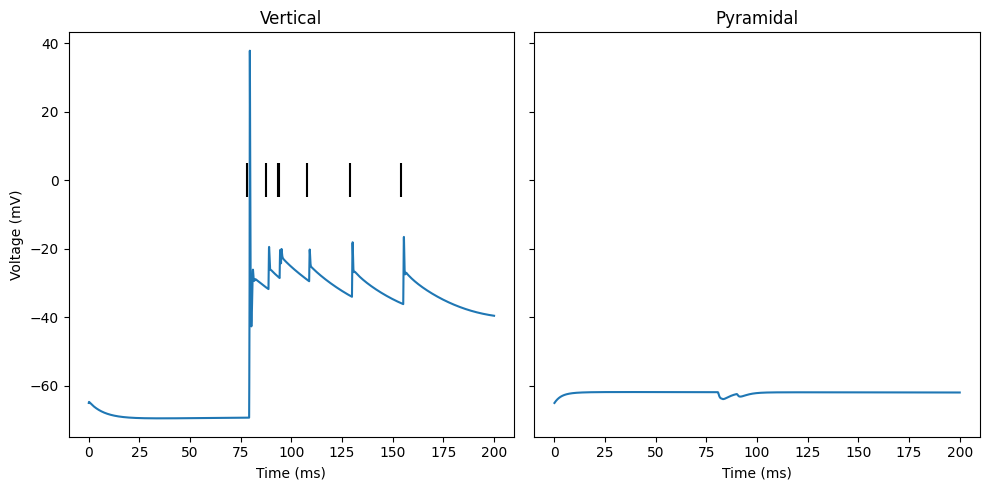

In [31]:
fig, axs = plt.subplots(1,2,figsize=(10,5), sharey=True)
axs.ravel()

axs[0].plot(t, vertical_v)
axs[0].set_title('Vertical')
axs[0].vlines(list(stim_t), ymin=-5, ymax=5, color='k')

axs[1].plot(t, pyramidal_v)
axs[1].set_title('Pyramidal')

for ax in axs:
    ax.set_xlabel('Time (ms)')

axs[0].set_ylabel('Voltage (mV)')

fig.tight_layout()

In [ ]:
# TODO: add poisson spike train to cells